## Mini project on Swiggy Restaurant Data Analysis Using Pyspark

## Dataset: swiggy_all_menus_india

## Source: https://www.kaggle.com/datasets/nikhilmaurya1324/swiggy-restaurant-data-india

In [53]:
sc

<SparkContext master=local[*] appName=PySparkShell>

# Dataset Insights

The dataset contains 1,000 records with 9 attributes: State, City, Restaurant Name, Location, Category, Dish Name, Price (INR), Rating, and Rating Count.
It is clean (no missing values) and consistent, making it well-suited for analyzing food trends, pricing, and customer preferences.

1. Price Distribution

Prices range from ₹12 (cheapest items) to ₹2997 (premium dishes).

The average price is about ₹257, suggesting most dishes are moderately priced.

A few high-price outliers reflect premium restaurants or large combo meals.

Most dishes cluster in the affordable–mid range, aligning with popular fast-food and casual dining patterns.

2. Factors Affecting Food Pricing & Popularity

City: The dataset covers multiple cities, with Bengaluru having the most entries (118 restaurants). This suggests strong Swiggy presence and demand in Bengaluru.

Category: The most frequent category is “Recommended” (114 dishes), followed by desserts, snacks, and pizzas, highlighting customer preferences.

Ratings:

Ratings range from 0.0 to 5.0.

The average rating is around 2.5, which is lower than expected, possibly due to new/unrated dishes.

High-rated dishes (>4.0) are concentrated in popular restaurants and premium items.

3. Restaurant & Food Insights

Restaurants: Popular chain restaurants like Subway, Pizza Hut, Domino’s, KFC appear frequently, showing strong dominance of fast-food brands.

Cuisine Diversity: Categories include desserts, soups, pizzas, biryanis, snacks, etc., highlighting Swiggy’s variety.

City Trends:

Bengaluru, New Delhi, Hyderabad, and Mumbai lead in restaurant representation.

Smaller cities have fewer entries but often feature regional specialties.

4. Key Patterns

Price vs Rating: Higher-priced dishes don’t always guarantee better ratings; moderately priced items often receive better reviews.

Category Popularity: “Recommended” dishes dominate, reflecting Swiggy’s algorithm-driven promotions.

Outliers: Premium dishes above ₹2000 are rare and likely from fine dining or combo meals.

5. Overall Insights

The dataset provides a clear picture of Swiggy’s food ecosystem:

Customers prefer affordable to mid-range dishes.

Fast-food and casual dining dominate across cities.

Bengaluru emerges as a major hub with the highest number of listed restaurants.

The dataset is valuable for studying pricing strategies, customer preferences, and city-level demand trends.

In [54]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Swiggy").getOrCreate()

In [55]:
df = spark.read.csv("swiggy_all_menus_india.csv", header=True, inferSchema=True)

In [56]:
print("=== First 10 rows of dataset ===")
df.show(10)

=== First 10 rows of dataset ===
+----------------+---------+--------------------+----------------+--------------------+--------------------+-----------+------+------------+
|           State|     City|     Restaurant Name|        Location|            Category|           Dish Name|Price (INR)|Rating|Rating Count|
+----------------+---------+--------------------+----------------+--------------------+--------------------+-----------+------+------------+
|         Tripura| Agartala|    Daya Hari Mithai|Kaman Chowmuhani|                Soup|         Tomato Soup|      120.0|   3.5|           6|
|           Delhi|New Delhi|              Subway|     Cleo County|         Recommended|Classic Veggie Cr...|      169.0|   4.5|          19|
|           Delhi|New Delhi|         Hira Sweets|     Indirapuram|   Cookies & Namkeen|Spl. Nam Ajwain C...|     127.12|   5.0|           4|
|Himachal Pradesh|   Shimla|           Pizza Hut|       Mall Road|   Flash Sale Pizzas|Royal Spice Panee...|      849.0| 

In [57]:
print("=== Print shema of the dataset ===")
df.printSchema()

=== Print shema of the dataset ===
root
 |-- State: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Restaurant Name: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Dish Name: string (nullable = true)
 |-- Price (INR): double (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Rating Count: integer (nullable = true)



In [58]:
# Row & column count
print("Total Rows:", df.count())
print("Total Columns:", len(df.columns))

Total Rows: 1004
Total Columns: 9


In [59]:
from pyspark.sql.functions import col, count, avg, desc, when
# Convert Rating & Price properly
df = df.withColumn("Rating", col("Rating").cast("double"))
df = df.withColumn("Price (INR)", col("`Price (INR)`").cast("double"))

In [60]:
df.groupBy("Restaurant Name").agg(avg("Rating").alias("avg_rating")) \
  .orderBy(desc("avg_rating")).show(10)

+--------------------+----------+
|     Restaurant Name|avg_rating|
+--------------------+----------+
|Dindigul Thalappa...|       5.0|
|     SRIVARI BHIMMAS|       5.0|
|Bansal Amritsari ...|       5.0|
|         Food On Way|       5.0|
|The Brooklyn Crea...|       5.0|
|Hola Pasta - Fres...|       5.0|
|        The Eleganza|       5.0|
|     Badmaash Kebabi|       5.0|
|          Jonas Cafe|       5.0|
|Indrani Sweets An...|       4.9|
+--------------------+----------+
only showing top 10 rows


In [61]:
df.groupBy("Category").count().orderBy(desc("count")).show(10)

+--------------------+-----+
|            Category|count|
+--------------------+-----+
|         Recommended|  114|
|            Desserts|   18|
|         Main Course|   18|
|           Beverages|   12|
|             BURGERS|   10|
|Exclusive Deals (...|    9|
|            Starters|    9|
|        South Indian|    9|
|              Combos|    8|
|               Pizza|    8|
+--------------------+-----+
only showing top 10 rows


In [62]:
df.groupBy("City").count().orderBy(desc("count")).show(10)

+----------+-----+
|      City|count|
+----------+-----+
| Bengaluru|  118|
| New Delhi|   61|
|   Chennai|   57|
| Hyderabad|   54|
|   Kolkata|   51|
|    Jaipur|   48|
| Ahmedabad|   47|
|    Mumbai|   45|
|   Lucknow|   42|
|Chandigarh|   41|
+----------+-----+
only showing top 10 rows


In [63]:
df.groupBy("City").agg(avg("Price (INR)").alias("avg_cost")).orderBy(desc("avg_cost")).show(10)

+---------+------------------+
|     City|          avg_cost|
+---------+------------------+
| Shillong| 316.4788888888889|
|   Indore| 302.7764864864865|
|   Shimla|          299.3415|
|  Chennai| 286.5126315789474|
|Hyderabad|281.78351851851846|
|    Kochi| 279.2857142857143|
|Bengaluru|275.44152542372876|
|   Panaji| 260.3388461538462|
|  Gurgaon| 258.2962962962963|
|  Kolkata| 257.9654901960784|
+---------+------------------+
only showing top 10 rows


In [64]:
# Restaurants with Price > 500
print("=== Restaurants with dishes costing more than 500 INR ===")
df.filter(df["Price (INR)"] > 500).show(10, truncate=False)

# Restaurants with Rating > 4.5
print("\n=== Restaurants with rating greater than 4.5 ===")
df.filter(df["Rating"] > 4.5).show(10, truncate=False)


=== Restaurants with dishes costing more than 500 INR ===
+----------------+---------+--------------------------------+----------------+-------------------------------------------+-------------------------------------------------------------------------------------------------------------------------+-----------+------+------------+
|State           |City     |Restaurant Name                 |Location        |Category                                   |Dish Name                                                                                                                |Price (INR)|Rating|Rating Count|
+----------------+---------+--------------------------------+----------------+-------------------------------------------+-------------------------------------------------------------------------------------------------------------------------+-----------+------+------------+
|Himachal Pradesh|Shimla   |Pizza Hut                       |Mall Road       |Flash Sale Pizzas                

In [65]:
# Highly rated dishes (Rating > 4.0) and Price < 300
print("\n=== Dishes with rating > 4.0 and price < 300 INR ===")
df.filter((df["Rating"] > 4.0) & (df["Price (INR)"] < 300)).show(10, truncate=False)

# Restaurants with more than 20 ratings
print("\n=== Restaurants having more than 20 ratings ===")
df.filter(df["Rating Count"] > 20).show(10, truncate=False)


=== Dishes with rating > 4.0 and price < 300 INR ===
+--------------+---------+---------------------------------------+-----------------+---------------------------------+--------------------------------------+-----------+------+------------+
|State         |City     |Restaurant Name                        |Location         |Category                         |Dish Name                             |Price (INR)|Rating|Rating Count|
+--------------+---------+---------------------------------------+-----------------+---------------------------------+--------------------------------------+-----------+------+------------+
|Delhi         |New Delhi|Subway                                 |Cleo County      |Recommended                      |Classic Veggie Craver (10cm)          |169.0      |4.5   |19          |
|Delhi         |New Delhi|Hira Sweets                            |Indirapuram      |Cookies & Namkeen                |Spl. Nam Ajwain Cookies (400 Gms)     |127.12     |5.0   |4         

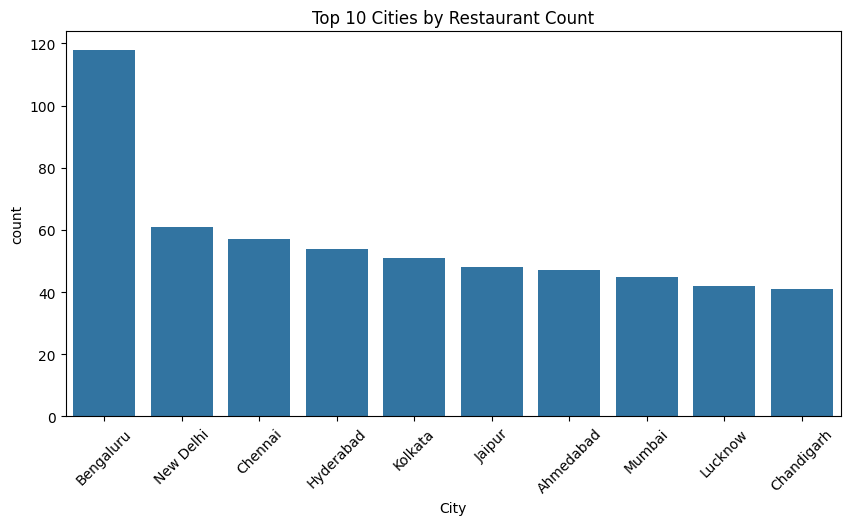

In [66]:
pdf = df.toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x="City", data=pdf, order=pdf["City"].value_counts().index[:10])
plt.title("Top 10 Cities by Restaurant Count")
plt.xticks(rotation=45)
plt.show()

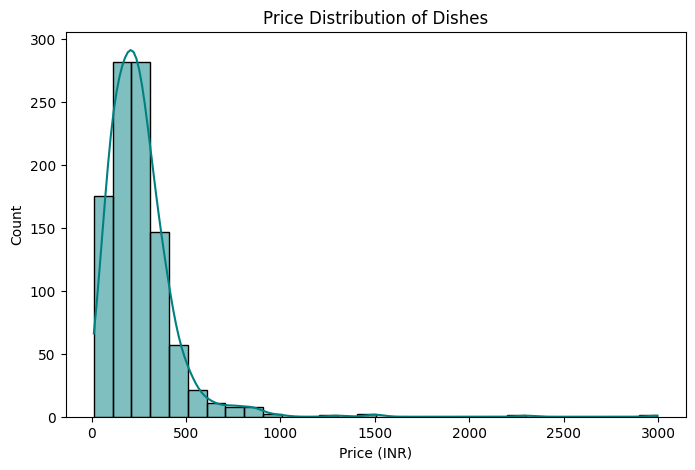

In [67]:
plt.figure(figsize=(8,5))
sns.histplot(pdf["Price (INR)"], bins=30, kde=True, color="teal")
plt.title("Price Distribution of Dishes")
plt.xlabel("Price (INR)")
plt.ylabel("Count")
plt.show()

C:\Users\santh\AppData\Local\Temp\ipykernel_19632\519909139.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_city.index, y=avg_rating_city.values, palette="viridis")


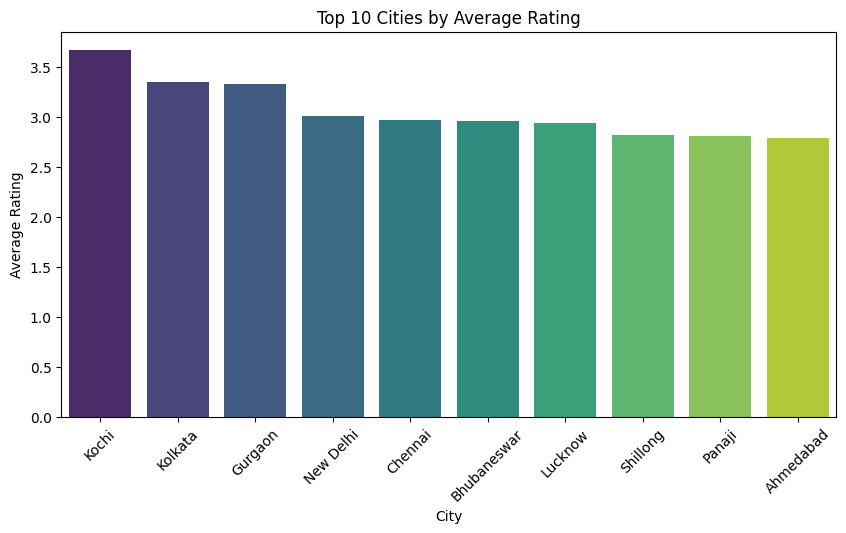

In [68]:
avg_rating_city = pdf.groupby("City")["Rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating_city.index, y=avg_rating_city.values, palette="viridis")
plt.title("Top 10 Cities by Average Rating")
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.show()

C:\Users\santh\AppData\Local\Temp\ipykernel_19632\1298723904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_restaurants.index, y=top_restaurants.values, palette="magma")


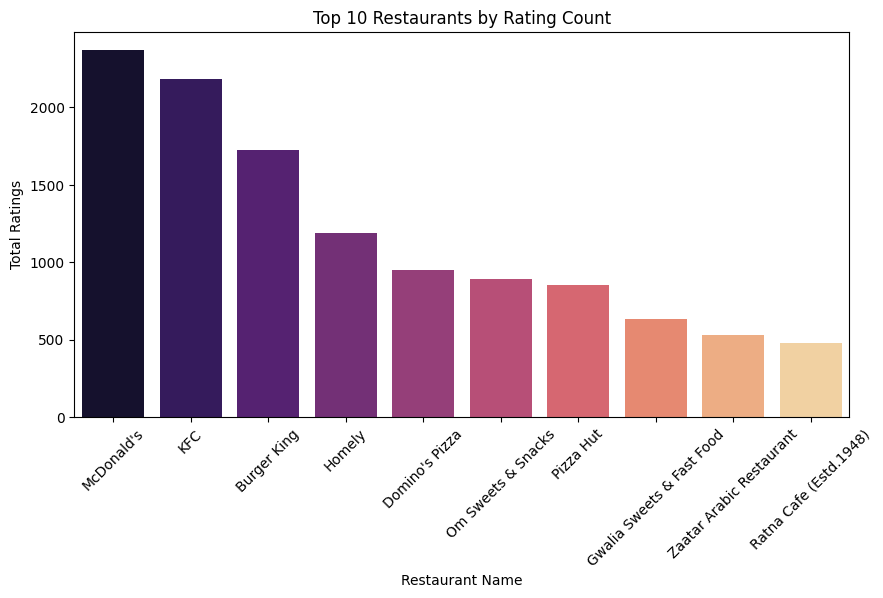

In [69]:
top_restaurants = pdf.groupby("Restaurant Name")["Rating Count"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_restaurants.index, y=top_restaurants.values, palette="magma")
plt.title("Top 10 Restaurants by Rating Count")
plt.xticks(rotation=45)
plt.ylabel("Total Ratings")
plt.show()

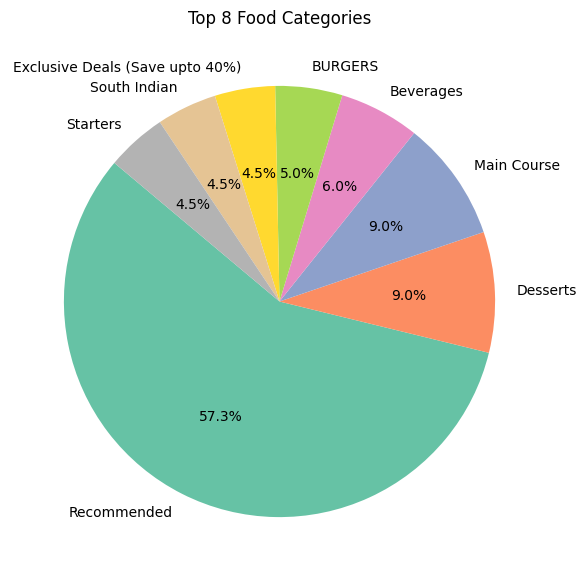

In [70]:
category_counts = pdf["Category"].value_counts().head(8)

plt.figure(figsize=(7,7))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Top 8 Food Categories")
plt.show()

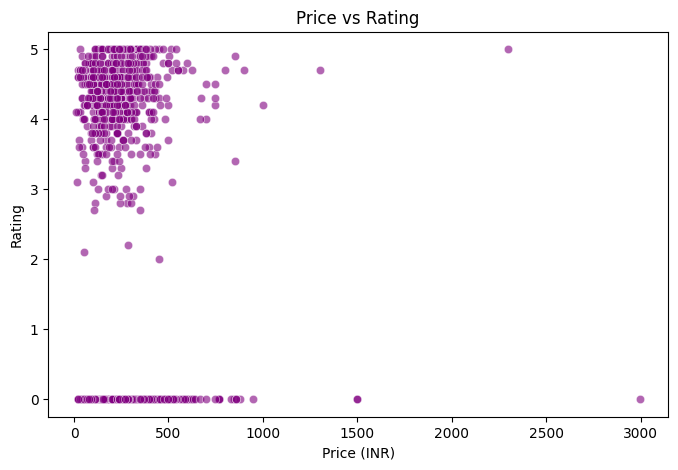

In [71]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Price (INR)", y="Rating", data=pdf, alpha=0.6, color="purple")
plt.title("Price vs Rating")
plt.xlabel("Price (INR)")
plt.ylabel("Rating")
plt.show()

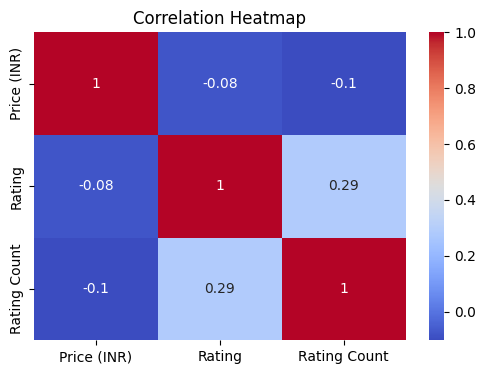

In [72]:
plt.figure(figsize=(6,4))
sns.heatmap(pdf[["Price (INR)", "Rating", "Rating Count"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Conclusion

The Swiggy dataset shows that Bengaluru leads in restaurant listings, with Recommended dishes and affordable price ranges (₹200–₹300) being the most common. While prices vary widely, most customers prefer moderately priced items. Ratings average around 2.5, but top-rated dishes (>4.0) are mainly from popular chains and categories like desserts and pizzas. Overall, the data highlights how city, price, and category strongly influence food trends and customer choices.